# Função de Distribuição Acumulada(Cap4) - Pense Estatística, 2º Edição.

## Universidade Federal de Alagoas - UFAL
## Centro de Tecnologia - CTEC
## Programa de Pós-Graduação Recursos Hídricos e Saneamento - PPGRHS
### Disciplina de Estatística

Clebson Farias

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

# Os limites das PMFs
- As Pmfs funcionam bem para tamanhos pequenos;
- Com o aumento do tamanho, a probabilidade diminui e aumenta os ruídos;
- Quando se tem uma amostra grande, é difícil de se fazer comparações usando uma Pmf;
- Podemos usar categorias para minizar esse problema, mas difícil de obter o tamanho de cada categoria;
- Uma outra solução é utilizar Função de Distribuição Acumulada (no inglês CDF).

# Percentis
- O percentil é o valor de uma evento ser menor ou igual;
- Percentil Rank: Calcula a classificação percentual do valor(recebido) em um conjunto de valores;
- Percentil: Calcula o valor correspondente ao percentil(recebido);


# CDFs
- A CDF mapeia os valores para um rank percentil;
- Para avaliar valor particular de x, calculamos a fração de valores na distribuição menor ou igual a x;
- Na CDF podemos avaliar qualquer valor, não apenas valores que aparecem na amostra;


# Representando CDFs
- thinkstats2 fornece uma classe chamada Cdf que representa CDFs;

Principais métodos:
- Prob(x): Dado um valor x, retorna a probabilidade;
- Value(p): Dado uma probabilidade, retorna o valor;

O contrutor recebe os argumentos:
- List;
- Series pandas;
- Hist;
- Pmf;
- Cdf.

In [2]:
dados = pd.read_csv('dadosXingo.csv', index_col=0, names=["Date", "Dados"], parse_dates=True)
dados.head()

,Dados
Date,
1931-01-01,5512.0
1931-01-02,5512.0
1931-01-03,5515.0
1931-01-04,5525.0
1931-01-05,5547.0


In [3]:
cdf = thinkstats2.Cdf(dados.Dados)
cdf

Cdf([  184.26   201.29   201.96 ... 18487.   18496.   18851.  ], [3.22102686e-05 6.44205373e-05 9.66308059e-05 ... 9.99935579e-01
 9.99967790e-01 1.00000000e+00])

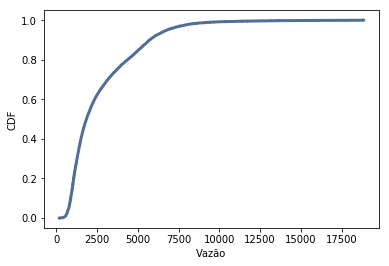

<Figure size 576x432 with 0 Axes>

In [4]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Vazão', ylabel='CDF')

- A CDF também fornece uma representação visual da forma da distribuição;
- Os valores mais comuns aparecem na parte mais íngreme da CDF;
- As informações de uma CDF são apresentadas com mais clareza do que uma PMF;

# Comparando CDFs
- As CDFs são especialmente úteis para comparações;
- As diferenças entre distribuições são mais claras na Cdf;


# Estatísticas Baseadas em Percentil
- A partir de uma CDF é fácil obter os percentil e rank percentil;

A Classe Cdf fornece dois métodos:
- PercentileRank(x): Dados uma valor x, retorna o percentil rank, 100·CDF(x).
- Percentile(p): Dado uma rank percentil p, retorna um valor, x. Equivalente ao Value(p/100).

Os percentil são usados para computar estatísticas baseadas em percentil;
- Percentil 50°, corresponde ao valor central da distribuição, conhecido como mediana;
- Outra estatítica é o intervalo interquantil, que é a diferença entre o percentil 75° e 25°;
- Usados para resumir a forma de uma distribuição.

In [10]:
p1 = cdf.PercentileRank(1000)
p2 = cdf.PercentileRank(2000)
p4 = cdf.PercentileRank(4000)

print('Rank Percentil de 1000: ', p1)
print('Rank Percentil de 2000: ', p2)
print('Rank Percentil de 4000: ', p4)

Rank Percentil de 1000:  16.124460478000387
Rank Percentil de 2000:  53.37563615280552
Rank Percentil de 4000:  77.40771758036462


In [12]:
q25 = cdf.Percentile(25)
q50 = cdf.Percentile(50)
q75 = cdf.Percentile(75)

print('Valor referente ao percentil 25: ', q25)
print('Valor referente ao percentil 50: ', q50)
print('Valor referente ao percentil 75: ', q75)

Valor referente ao percentil 25:  1165.0
Valor referente ao percentil 50:  1849.0
Valor referente ao percentil 75:  3709.0


# Números Aleatórios
- 